## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_DS = mouse_metadata.merge(study_results,left_on='Mouse ID',right_on='Mouse ID',suffixes=(False,False))

# Display the data table for preview
combined_DS.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
combined_DS.groupby('Sex').count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [21]:
# Checking the number of mice.
print('Mouse count before dropping duplicates : ' + str(combined_DS['Mouse ID'].count()))

Mouse count before dropping duplicates : 1893


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_DS[combined_DS.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseid = combined_DS[combined_DS['Mouse ID']=='g989']
dup_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
combined_DS=combined_DS.drop(dup_mouseid.index)
combined_DS

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# the below query gives all mouse ID's without duplicate values across all columns
#mouse_metadata = mouse_metadata.drop_duplicates()
#study_results_no_dups = study_results.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
#combined_DS_without_DUPS = pd.merge(mouse_metadata,study_results_no_dups,left_on='Mouse ID', right_on='Mouse ID',suffixes=(False,False))
#combined_DS_without_DUPS

# Drop all duplicate rows across all Mouse ID's
clean_df=combined_DS.drop_duplicates(['Mouse ID'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_Volume_MEAN = combined_DS.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_Volume_MEDIAN = combined_DS.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_Volume_VAR = combined_DS.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_Volume_STD = combined_DS.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_Volume_SEM = combined_DS.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Summary_Statistics_df = pd.DataFrame({'Tumor Volume MEAN':Tumor_Volume_MEAN,
                                     'Tumor Volume MEDIAN': Tumor_Volume_MEDIAN,
                                     'Tumor Volume VAR': Tumor_Volume_VAR,
                                     'Tumor Volume STD': Tumor_Volume_STD,
                                     'Tumor Volume SEM': Tumor_Volume_SEM})

Summary_Statistics_df

,Tumor Volume MEAN,Tumor Volume MEDIAN,Tumor Volume VAR,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug = combined_DS.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
drug.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of unique mice tested on each drug regimen')

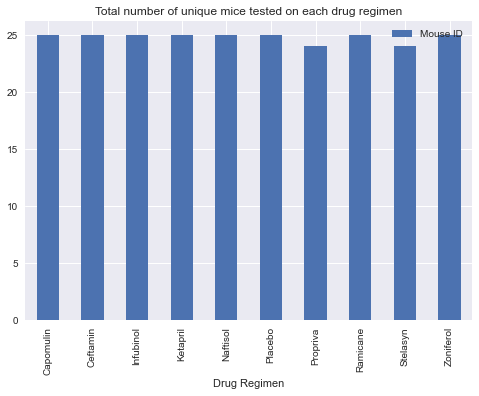

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.style.use('seaborn')
count = pd.DataFrame(clean_df.groupby('Drug Regimen')['Mouse ID'].count())
count.plot(kind='bar')
plt.ylim=(0,30)
plt.title("Total number of unique mice tested on each drug regimen")

<BarContainer object of 10 artists>

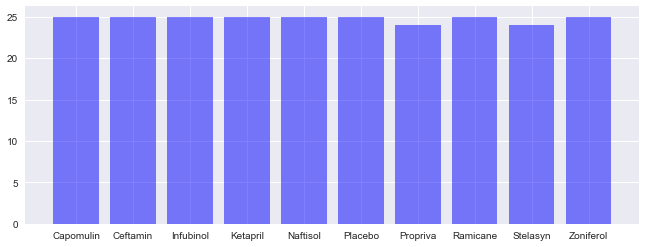

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#plt.style.use('')

count_pyplot = pd.DataFrame(clean_df.groupby('Drug Regimen')['Mouse ID'].count()).reset_index()

plt.figure(figsize=(11,4))

plt.bar(count_pyplot['Drug Regimen'],count_pyplot['Mouse ID'],color='b',alpha=0.5, align="center")

Text(0, 0.5, '')

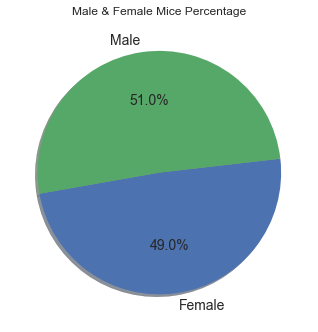

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

f_v_m_data = pd.DataFrame(combined_DS.groupby('Sex')['Mouse ID'].count())


plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
f_v_m_data.plot(kind="pie", y = 'Mouse ID', ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True,  legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")


In [32]:
plt.clf()
plt.cla()
plt.close()

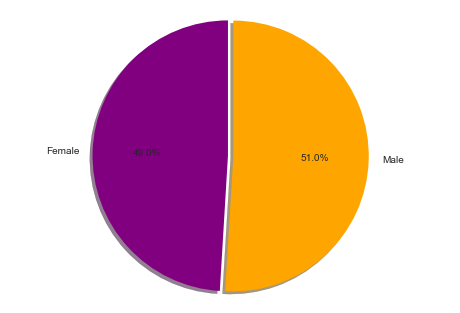

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

f_v_m_data_pyplot = pd.DataFrame(combined_DS.groupby('Sex')['Mouse ID'].count()).reset_index()
sizes = f_v_m_data_pyplot['Mouse ID']
labels = f_v_m_data_pyplot['Sex']
colors = ["purple", "orange"]
explode = (0, 0.04)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
plt.clf()
plt.cla()
plt.close()

In [35]:
sizes

0    922
1    958
Name: Mouse ID, dtype: int64

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = combined_DS.drop_duplicates(subset=['Mouse ID'],keep='last')

# Prepare separate df for each drug
Capomulin_df = last_tp_df[last_tp_df['Drug Regimen']=='Capomulin']
Ramicane_df = last_tp_df[last_tp_df['Drug Regimen']=='Ramicane']
Infubinol_df = last_tp_df[last_tp_df['Drug Regimen']=='Infubinol']
Ceftamin_df = last_tp_df[last_tp_df['Drug Regimen']=='Ceftamin']


### Preparing Tumor volume data for Capomulin

In [51]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_df,combined_DS,on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"],how='left')
Capomulin_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
5,y793,Capomulin,Male,17,17,45,31.896238,2
6,r554,Capomulin,Female,8,17,45,32.377357,3
7,m957,Capomulin,Female,3,19,45,33.329098,1
8,t565,Capomulin,Female,20,17,45,34.455298,0
9,i738,Capomulin,Female,23,20,45,37.311846,2


In [52]:
cap_tumor_vol_data = Capomulin_merge['Tumor Volume (mm3)']

quartiles = cap_tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


###  Preparing Tumor volume data for Ramicane

In [53]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_df,combined_DS,on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"],how='left')
Ramicane_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0


In [54]:
ram_tumor_vol_data = Ramicane_merge['Tumor Volume (mm3)']

quartiles2 = ram_tumor_vol_data.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2


lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


###  Preparing Tumor volume data for Infubinol

In [55]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_df,combined_DS,on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"],how='left')
Infubinol_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2


In [44]:
infu_tumor_vol_data = Infubinol_merge['Tumor Volume (mm3)']

quartiles3 = infu_tumor_vol_data.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3


lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


###  Preparing Tumor volume data for Ceftamin

In [45]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_df,combined_DS,on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"],how='left')
Ceftamin_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [46]:
ceft_tumor_vol_data = Ceftamin_merge['Tumor Volume (mm3)']

quartiles4 = ceft_tumor_vol_data.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4


lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin in potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin in potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


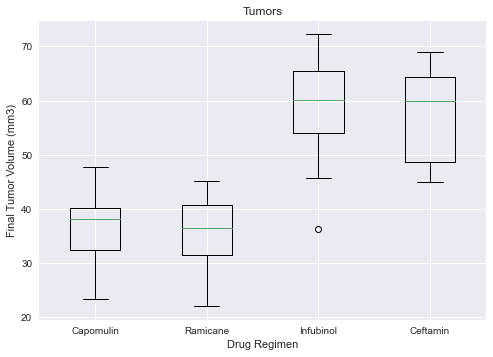

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


data_to_plot = [cap_tumor_vol_data, ram_tumor_vol_data, infu_tumor_vol_data, ceft_tumor_vol_data]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_line = combined_DS[combined_DS["Drug Regimen"] == "Capomulin"]
forline_df = Cap_line.loc[Cap_line["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


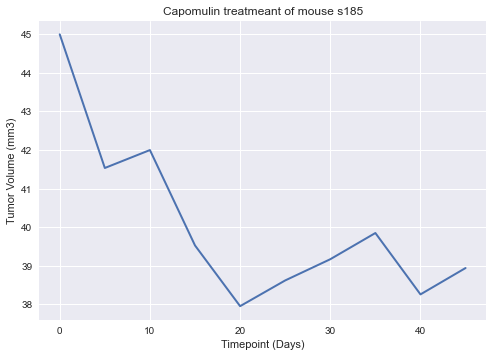

In [73]:
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [74]:
cap_regimen = Cap_line.groupby('Mouse ID').mean()
average_tumor_volume = cap_regimen['Tumor Volume (mm3)']
mouse_weight = cap_regimen['Weight (g)']

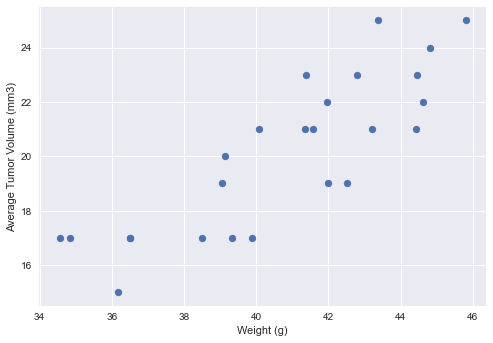

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(average_tumor_volume,mouse_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_regimen['Weight (g)'],cap_regimen['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [77]:
model=st.linregress(cap_regimen['Weight (g)'],cap_regimen['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [78]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

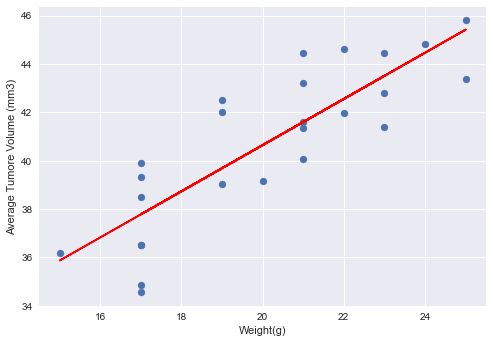

In [79]:
y_values = cap_regimen['Weight (g)']*mslope+bintercept
plt.scatter(cap_regimen['Weight (g)'],cap_regimen['Tumor Volume (mm3)'])
plt.plot(cap_regimen['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()